In [1]:
import numpy as np
from typing import List, Callable
import matplotlib.pyplot as plt
import scipy
import tqdm.auto as tqdm
import scipy.stats as st

XM = 15

In [ ]:
def draw_pareto(num_samples: int, alpha: float, xm: float) -> np.ndarray:
    
    return (1 + np.random.pareto(a = alpha, size = num_samples)) * xm

def plot_histogram(data: np.ndarray, num_bins):
    
    plt.hist(data, bins = num_bins, density = False)
    plt.show()
    
def get_one_point_likelihood(x: float, xm: float) -> Callable:
    
    return lambda alpha: 0 if x < xm else np.log((alpha * xm**alpha)/(x**(alpha + 1)))

def get_sample_likelihood(sample: np.ndarray, xm: float) -> Callable:
    
    sum_likelihood = lambda alpha: np.sum([get_one_point_likelihood(x=x, xm = xm)(alpha = alpha) for x in sample])
    return sum_likelihood 

def get_maximum_likelihood_alpha(sample, initial, xm) -> float:
    
    negative_likelihood_func = lambda alpha: - (get_sample_likelihood(sample, xm = xm))(alpha = alpha)
    best_alpha = scipy.optimize.fmin(negative_likelihood_func, x0 = initial, maxiter = 1000000)
    return best_alpha


def plot_sample_likelihood_by_alpha(sample, xm):
    
    alphas = np.arange(0.05, 20, 0.05)
    likelihoods = []
    for alpha in tqdm.tqdm(alphas):
        
        likelihoods.append(get_sample_likelihood(sample, xm = xm)(alpha = alpha))

    plt.plot(alphas, likelihoods)
    plt.show()

def calc_confidence_interval(xm, alpha, n = 100):
    
    alphas = []
    for i in tqdm.tqdm(range(n)):
        
        sample = draw_pareto(1000, alpha = alpha, xm = xm)
        alpha_max = get_maximum_likelihood_alpha(sample, initial = 6.96, xm = xm)
        alphas.append(alpha_max.item())

    # confidence = 0.5
    
    interval50 = st.t.interval(0.5, len(alphas)-1, loc=np.mean(alphas), scale=st.sem(alphas))
    
    # confidence = 0.95
    
    interval95 = st.t.interval(0.95, len(alphas)-1, loc=np.mean(alphas), scale=st.sem(alphas))
   
    # confidence = 0.99
    
    interval99 = st.t.interval(0.99, len(alphas)-1, loc=np.mean(alphas), scale=st.sem(alphas))
    
    print("conf-50: {}, conf-95: {}, conf-99: {}".format(interval50, interval95, interval99))
    print("std: {}".format(np.std(alphas)))    
    
    plot_histogram(alphas, num_bins = 50)

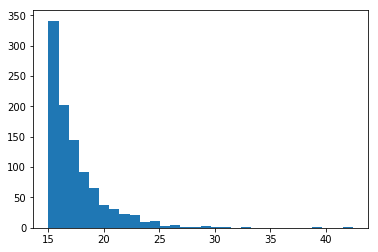

In [3]:
sample = draw_pareto(1000, alpha = 7, xm = XM)
plot_histogram(data = sample, num_bins = 30)

In [4]:
one_point_likelihood = get_one_point_likelihood(x = 5.5, xm = XM)
sample_likelihood  = get_sample_likelihood(sample, xm = XM)
print(one_point_likelihood(alpha = 7))
print(sample_likelihood(alpha = 7))
print(get_maximum_likelihood_alpha(sample, initial = 3, xm = XM))


0
-1905.208229733653
Optimization terminated successfully.
         Current function value: 1905.208213
         Iterations: 19
         Function evaluations: 38
[6.99873047]


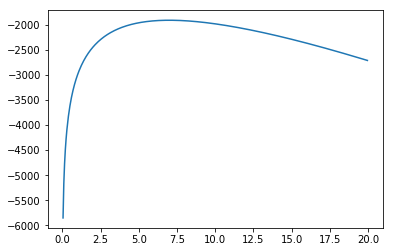

In [5]:
plot_sample_likelihood_by_alpha(sample, xm = XM)

Optimization terminated successfully.
         Current function value: 1958.526271
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 2001.587927
         Iterations: 15
         Function evaluations: 30
Optimization terminated successfully.
         Current function value: 1991.489971
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 2039.010201
         Iterations: 15
         Function evaluations: 30
Optimization terminated successfully.
         Current function value: 2039.163802
         Iterations: 15
         Function evaluations: 30
Optimization terminated successfully.
         Current function value: 2008.245638
         Iterations: 15
         Function evaluations: 30
Optimization terminated successfully.
         Current function value: 2011.867685
         Iterations: 15
         Function evaluations: 30
Optimization 

Optimization terminated successfully.
         Current function value: 2012.024553
         Iterations: 15
         Function evaluations: 30
Optimization terminated successfully.
         Current function value: 2027.295955
         Iterations: 15
         Function evaluations: 30
Optimization terminated successfully.
         Current function value: 2006.688675
         Iterations: 15
         Function evaluations: 30
Optimization terminated successfully.
         Current function value: 1985.232884
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1895.672960
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1832.567755
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1809.040674
         Iterations: 14
         Function evaluations: 28
Optimization 

Optimization terminated successfully.
         Current function value: 1580.565063
         Iterations: 17
         Function evaluations: 34
Optimization terminated successfully.
         Current function value: 1547.970064
         Iterations: 17
         Function evaluations: 34
Optimization terminated successfully.
         Current function value: 1572.079994
         Iterations: 17
         Function evaluations: 34
Optimization terminated successfully.
         Current function value: 1564.799907
         Iterations: 17
         Function evaluations: 34
Optimization terminated successfully.
         Current function value: 1543.901715
         Iterations: 17
         Function evaluations: 34
Optimization terminated successfully.
         Current function value: 1462.850420
         Iterations: 18
         Function evaluations: 36
Optimization terminated successfully.
         Current function value: 1489.998014
         Iterations: 18
         Function evaluations: 36
Optimization 

Optimization terminated successfully.
         Current function value: 1179.113059
         Iterations: 19
         Function evaluations: 38
Optimization terminated successfully.
         Current function value: 1143.837306
         Iterations: 20
         Function evaluations: 40
Optimization terminated successfully.
         Current function value: 1162.511110
         Iterations: 20
         Function evaluations: 40
Optimization terminated successfully.
         Current function value: 1123.253945
         Iterations: 20
         Function evaluations: 40
Optimization terminated successfully.
         Current function value: 1068.064666
         Iterations: 20
         Function evaluations: 40
Optimization terminated successfully.
         Current function value: 1057.344965
         Iterations: 20
         Function evaluations: 40
Optimization terminated successfully.
         Current function value: 1048.923383
         Iterations: 20
         Function evaluations: 40
Optimization 

Optimization terminated successfully.
         Current function value: 1017.681994
         Iterations: 20
         Function evaluations: 40
Optimization terminated successfully.
         Current function value: 1068.092189
         Iterations: 20
         Function evaluations: 40
Optimization terminated successfully.
         Current function value: 1065.063288
         Iterations: 20
         Function evaluations: 40
Optimization terminated successfully.
         Current function value: 1042.996769
         Iterations: 20
         Function evaluations: 40
Optimization terminated successfully.
         Current function value: 1025.591046
         Iterations: 20
         Function evaluations: 40
Optimization terminated successfully.
         Current function value: 1068.767174
         Iterations: 20
         Function evaluations: 40
Optimization terminated successfully.
         Current function value: 1089.303899
         Iterations: 20
         Function evaluations: 40
Optimization 

Optimization terminated successfully.
         Current function value: 1273.474459
         Iterations: 19
         Function evaluations: 38
Optimization terminated successfully.
         Current function value: 1315.253276
         Iterations: 19
         Function evaluations: 38
Optimization terminated successfully.
         Current function value: 1345.043524
         Iterations: 19
         Function evaluations: 38
Optimization terminated successfully.
         Current function value: 1376.623800
         Iterations: 18
         Function evaluations: 36
Optimization terminated successfully.
         Current function value: 1342.580411
         Iterations: 19
         Function evaluations: 38
Optimization terminated successfully.
         Current function value: 1356.526531
         Iterations: 18
         Function evaluations: 36
Optimization terminated successfully.
         Current function value: 1325.396632
         Iterations: 19
         Function evaluations: 38
Optimization 

Optimization terminated successfully.
         Current function value: 1505.636300
         Iterations: 17
         Function evaluations: 34
Optimization terminated successfully.
         Current function value: 1484.291067
         Iterations: 18
         Function evaluations: 36
Optimization terminated successfully.
         Current function value: 1448.713567
         Iterations: 18
         Function evaluations: 36
Optimization terminated successfully.
         Current function value: 1457.019351
         Iterations: 18
         Function evaluations: 36
Optimization terminated successfully.
         Current function value: 1451.647170
         Iterations: 18
         Function evaluations: 36
Optimization terminated successfully.
         Current function value: 1440.488124
         Iterations: 18
         Function evaluations: 36
Optimization terminated successfully.
         Current function value: 1393.136598
         Iterations: 18
         Function evaluations: 36
Optimization 

Optimization terminated successfully.
         Current function value: 1135.705342
         Iterations: 20
         Function evaluations: 40
Optimization terminated successfully.
         Current function value: 1154.479868
         Iterations: 20
         Function evaluations: 40
Optimization terminated successfully.
         Current function value: 1173.563978
         Iterations: 20
         Function evaluations: 40
Optimization terminated successfully.
         Current function value: 1106.607323
         Iterations: 20
         Function evaluations: 40
Optimization terminated successfully.
         Current function value: 1093.081953
         Iterations: 20
         Function evaluations: 40
Optimization terminated successfully.
         Current function value: 1039.491458
         Iterations: 20
         Function evaluations: 40
Optimization terminated successfully.
         Current function value: 1043.560691
         Iterations: 20
         Function evaluations: 40
Optimization 

Optimization terminated successfully.
         Current function value: 1264.816678
         Iterations: 19
         Function evaluations: 38
Optimization terminated successfully.
         Current function value: 1348.904411
         Iterations: 19
         Function evaluations: 38
Optimization terminated successfully.
         Current function value: 1371.616890
         Iterations: 18
         Function evaluations: 36
Optimization terminated successfully.
         Current function value: 1361.514630
         Iterations: 18
         Function evaluations: 36
Optimization terminated successfully.
         Current function value: 1353.709255
         Iterations: 19
         Function evaluations: 38
Optimization terminated successfully.
         Current function value: 1330.563601
         Iterations: 19
         Function evaluations: 38
Optimization terminated successfully.
         Current function value: 1290.610181
         Iterations: 19
         Function evaluations: 38
Optimization 

Optimization terminated successfully.
         Current function value: 1490.747119
         Iterations: 18
         Function evaluations: 36
Optimization terminated successfully.
         Current function value: 1482.286272
         Iterations: 18
         Function evaluations: 36
Optimization terminated successfully.
         Current function value: 1483.952733
         Iterations: 18
         Function evaluations: 36
Optimization terminated successfully.
         Current function value: 1498.020275
         Iterations: 17
         Function evaluations: 34
Optimization terminated successfully.
         Current function value: 1481.543742
         Iterations: 18
         Function evaluations: 36
Optimization terminated successfully.
         Current function value: 1480.798377
         Iterations: 18
         Function evaluations: 36
Optimization terminated successfully.
         Current function value: 1433.115581
         Iterations: 18
         Function evaluations: 36
Optimization 

Optimization terminated successfully.
         Current function value: 990.334876
         Iterations: 20
         Function evaluations: 40
Optimization terminated successfully.
         Current function value: 974.864889
         Iterations: 21
         Function evaluations: 42
Optimization terminated successfully.
         Current function value: 989.516450
         Iterations: 20
         Function evaluations: 40
Optimization terminated successfully.
         Current function value: 1038.004644
         Iterations: 20
         Function evaluations: 40
Optimization terminated successfully.
         Current function value: 1047.057329
         Iterations: 20
         Function evaluations: 40
Optimization terminated successfully.
         Current function value: 1023.531018
         Iterations: 20
         Function evaluations: 40
Optimization terminated successfully.
         Current function value: 967.826872
         Iterations: 21
         Function evaluations: 42
Optimization term

Optimization terminated successfully.
         Current function value: 1318.162427
         Iterations: 19
         Function evaluations: 38
Optimization terminated successfully.
         Current function value: 1284.404252
         Iterations: 19
         Function evaluations: 38
Optimization terminated successfully.
         Current function value: 1324.393131
         Iterations: 19
         Function evaluations: 38
Optimization terminated successfully.
         Current function value: 1337.115818
         Iterations: 19
         Function evaluations: 38
Optimization terminated successfully.
         Current function value: 1342.435123
         Iterations: 19
         Function evaluations: 38
Optimization terminated successfully.
         Current function value: 1303.838626
         Iterations: 19
         Function evaluations: 38
Optimization terminated successfully.
         Current function value: 1331.774223
         Iterations: 19
         Function evaluations: 38
Optimization 

Optimization terminated successfully.
         Current function value: 1438.651315
         Iterations: 18
         Function evaluations: 36
Optimization terminated successfully.
         Current function value: 1470.997325
         Iterations: 18
         Function evaluations: 36
Optimization terminated successfully.
         Current function value: 1518.200983
         Iterations: 17
         Function evaluations: 34
Optimization terminated successfully.
         Current function value: 1542.848687
         Iterations: 17
         Function evaluations: 34
Optimization terminated successfully.
         Current function value: 1523.675828
         Iterations: 17
         Function evaluations: 34
Optimization terminated successfully.
         Current function value: 1539.165181
         Iterations: 17
         Function evaluations: 34
Optimization terminated successfully.
         Current function value: 1554.608795
         Iterations: 17
         Function evaluations: 34
Optimization 

Optimization terminated successfully.
         Current function value: 1030.434949
         Iterations: 20
         Function evaluations: 40
Optimization terminated successfully.
         Current function value: 955.010165
         Iterations: 21
         Function evaluations: 42
Optimization terminated successfully.
         Current function value: 965.131458
         Iterations: 21
         Function evaluations: 42
Optimization terminated successfully.
         Current function value: 1008.732881
         Iterations: 20
         Function evaluations: 40
Optimization terminated successfully.
         Current function value: 1023.341463
         Iterations: 20
         Function evaluations: 40
Optimization terminated successfully.
         Current function value: 1029.837408
         Iterations: 20
         Function evaluations: 40
Optimization terminated successfully.
         Current function value: 1047.637305
         Iterations: 20
         Function evaluations: 40
Optimization te

Optimization terminated successfully.
         Current function value: 1227.788309
         Iterations: 19
         Function evaluations: 38
Optimization terminated successfully.
         Current function value: 1207.947823
         Iterations: 19
         Function evaluations: 38
Optimization terminated successfully.
         Current function value: 1174.985759
         Iterations: 20
         Function evaluations: 40
Optimization terminated successfully.
         Current function value: 1245.326997
         Iterations: 19
         Function evaluations: 38
Optimization terminated successfully.
         Current function value: 1226.531708
         Iterations: 19
         Function evaluations: 38
Optimization terminated successfully.
         Current function value: 1203.983828
         Iterations: 19
         Function evaluations: 38
Optimization terminated successfully.
         Current function value: 1224.068459
         Iterations: 19
         Function evaluations: 38
Optimization 

Optimization terminated successfully.
         Current function value: 1362.689850
         Iterations: 18
         Function evaluations: 36
Optimization terminated successfully.
         Current function value: 1382.853769
         Iterations: 18
         Function evaluations: 36
Optimization terminated successfully.
         Current function value: 1354.614446
         Iterations: 19
         Function evaluations: 38
Optimization terminated successfully.
         Current function value: 1377.966884
         Iterations: 18
         Function evaluations: 36
Optimization terminated successfully.
         Current function value: 1349.582951
         Iterations: 19
         Function evaluations: 38
Optimization terminated successfully.
         Current function value: 1366.597289
         Iterations: 18
         Function evaluations: 36
Optimization terminated successfully.
         Current function value: 1397.877075
         Iterations: 18
         Function evaluations: 36
Optimization 

Optimization terminated successfully.
         Current function value: 1093.533822
         Iterations: 20
         Function evaluations: 40
Optimization terminated successfully.
         Current function value: 1091.009515
         Iterations: 20
         Function evaluations: 40
Optimization terminated successfully.
         Current function value: 1098.502668
         Iterations: 20
         Function evaluations: 40
Optimization terminated successfully.
         Current function value: 1087.931380
         Iterations: 20
         Function evaluations: 40
Optimization terminated successfully.
         Current function value: 1099.096729
         Iterations: 20
         Function evaluations: 40
Optimization terminated successfully.
         Current function value: 1176.643404
         Iterations: 20
         Function evaluations: 40
Optimization terminated successfully.
         Current function value: 1171.891903
         Iterations: 20
         Function evaluations: 40
Optimization 

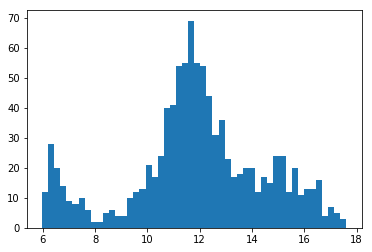

In [12]:
calc_confidence_interval(xm=XM, alpha = 7, n = 1000)